In [17]:
import os
import sys
import gzip
import json
import pandas as pd
from scipy.stats import ttest_ind, ttest_rel
from argparse import ArgumentParser

# 25% Text Embedding Model had a better NDCG@10 score than the baseline using both genre and title
# Do paired sample ttest : ttest_rel

predictions_file_1 = 'results/BERT4rec.ml-1m/ml1m_jpq_2024_08_23T02_11_55/predictions/sasrjpq-emb:512-pqm:64.json.gz' 
predictions_file_2 = 'results/BERT4rec.ml-1m/ml1m_jpq_2024_08_12T12_24_28/predictions/sasrjpq-emb:512-pqm:64.json.gz'
first_name = os.path.basename(predictions_file_1).rstrip(".json.gz")
second_name = os.path.basename(predictions_file_2).rstrip(".json.gz")

def get_metrics(doc):
    result = doc['metrics']
    if 'sampled_metrics' in doc:
        for key in doc['sampled_metrics']:
            result[f"sampled_{key}"] = doc['sampled_metrics'][key]
    return result

def read_data(filename):
    result = []
    data = json.load(gzip.open(filename))
    for doc in data:
        metrics = get_metrics(doc)
        result.append(metrics)
    return pd.DataFrame(result)

df1 = read_data(predictions_file_1)
df2 = read_data(predictions_file_2)
# print(df1.head())
# print(df2.head())

overlap_columns = set(df1.columns).intersection(set(df2.columns))
print(overlap_columns)

# Add metrics to be compared here
overlap_columns = ['ndcg@10']


docs = []

for column_name in overlap_columns:
    df1_series = df1[column_name]
    df2_series = df2[column_name]

    mean1 = df1_series.mean()
    mean2 = df2_series.mean()
    doc = {}
    doc["metric_name"] = column_name
    doc[first_name] = mean1
    doc[second_name] = mean2
    doc["difference"] = mean2 - mean1
    doc["difference_pct"] = (mean2 - mean1) * 100 / mean1
    t, pval = ttest_rel(df1_series, df2_series) 
    doc["p_value"] = pval 
    doc["p_value_bonferoni"] = pval * len(overlap_columns)
    docs.append(doc)

result = pd.DataFrame(docs)
result['significant_0.05'] = result["p_value"] < 0.05
result['significant_0.01'] = result["p_value"] < 0.01
result['significant_0.001'] = result["p_value"] < 0.001
result['significant_0.0001'] = result["p_value"] < 0.0001

with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.expand_frame_repr', False):  # more options can be specified also
    print(result)



{'HIT@4', 'HIT@1', 'ndcg@10', 'MAP@10', 'HIT@10', 'MRR', 'ndcg@40', 'HIT@5', 'ndcg@5'}
  metric_name  sasrjpq-emb:512-pqm:64  difference  difference_pct   p_value  p_value_bonferoni  significant_0.05  significant_0.01  significant_0.001  significant_0.0001
0      ndcg@5                0.109698    0.004152        3.934218  0.156828           0.156828             False             False              False               False


In [18]:
result

,metric_name,sasrjpq-emb:512-pqm:64,difference,difference_pct,p_value,p_value_bonferoni,significant_0.05,significant_0.01,significant_0.001,significant_0.0001
0,ndcg@5,0.109698,0.004152,3.934218,0.156828,0.156828,False,False,False,False


In [8]:
#12.5 % Text
import os
import sys
import gzip
import json
import pandas as pd
from scipy.stats import ttest_ind, ttest_rel
from argparse import ArgumentParser
predictions_file_1 = 'results/BERT4rec.ml-1m/ml1m_jpq_2024_08_19T18_42_55/predictions/sasrjpq-emb:512-pqm:64.json.gz' 
predictions_file_2 = 'results/BERT4rec.ml-1m/ml1m_jpq_2024_08_18T17_37_03/predictions/sasrjpq-emb:512-pqm:64.json.gz'
first_name = os.path.basename(predictions_file_1).rstrip(".json.gz")
second_name = os.path.basename(predictions_file_2).rstrip(".json.gz")

def get_metrics(doc):
    result = doc['metrics']
    if 'sampled_metrics' in doc:
        for key in doc['sampled_metrics']:
            result[f"sampled_{key}"] = doc['sampled_metrics'][key]
    return result

def read_data(filename):
    result = []
    data = json.load(gzip.open(filename))
    for doc in data:
        metrics = get_metrics(doc)
        result.append(metrics)
    return pd.DataFrame(result)

df1 = read_data(predictions_file_1)
df2 = read_data(predictions_file_2)
# print(df1.head())
# print(df2.head())

overlap_columns = set(df1.columns).intersection(set(df2.columns))
print(overlap_columns)

# Add metrics to be compared here
overlap_columns = ['ndcg@10']


docs = []

for column_name in overlap_columns:
    df1_series = df1[column_name]
    df2_series = df2[column_name]

    mean1 = df1_series.mean()
    mean2 = df2_series.mean()
    doc = {}
    doc["metric_name"] = column_name
    doc[first_name] = mean1
    doc[second_name] = mean2
    doc["difference"] = mean2 - mean1
    doc["difference_pct"] = (mean2 - mean1) * 100 / mean1
    t, pval = ttest_rel(df1_series, df2_series) 
    doc["p_value"] = pval 
    doc["p_value_bonferoni"] = pval * len(overlap_columns)
    docs.append(doc)

result = pd.DataFrame(docs)
result['significant_0.05'] = result["p_value"] < 0.05
result['significant_0.01'] = result["p_value"] < 0.01
result['significant_0.001'] = result["p_value"] < 0.001
result['significant_0.0001'] = result["p_value"] < 0.0001

with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.expand_frame_repr', False):  # more options can be specified also
    print(result)



{'HIT@4', 'HIT@1', 'ndcg@10', 'MAP@10', 'HIT@10', 'MRR', 'ndcg@40', 'HIT@5', 'ndcg@5'}
  metric_name  sasrjpq-emb:512-pqm:64  difference  difference_pct   p_value  p_value_bonferoni  significant_0.05  significant_0.01  significant_0.001  significant_0.0001
0     ndcg@10                0.132437    0.006615        5.257621  0.024184           0.024184              True             False              False               False


In [9]:
result

,metric_name,sasrjpq-emb:512-pqm:64,difference,difference_pct,p_value,p_value_bonferoni,significant_0.05,significant_0.01,significant_0.001,significant_0.0001
0,ndcg@10,0.132437,0.006615,5.257621,0.024184,0.024184,True,False,False,False


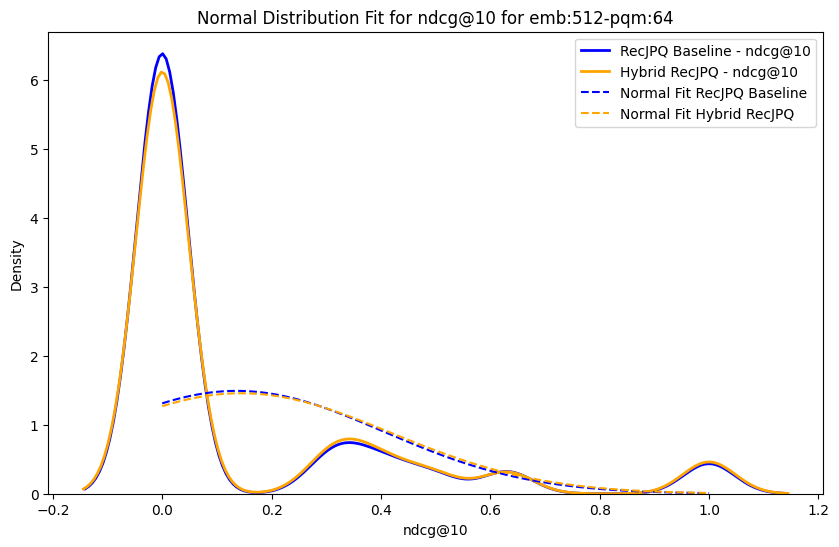

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

column_name = 'ndcg@10'
plt.figure(figsize=(10, 6))

# Get data for the column
data1 = df1[column_name].dropna()
data2 = df2[column_name].dropna()

# Plot KDE for df1
sns.kdeplot(data1, label=f'RecJPQ Baseline - {column_name}', color='blue', fill=False, linestyle='-', linewidth=2)

# Plot KDE for df2
sns.kdeplot(data2, label=f'Hybrid RecJPQ - {column_name}', color='orange', fill=False, linestyle='-', linewidth=2)

# Fit normal distribution and plot
mu1, std1 = norm.fit(data1)
mu2, std2 = norm.fit(data2)

xmin, xmax = min(data1.min(), data2.min()), max(data1.max(), data2.max())
x = np.linspace(xmin, xmax, 100)

p1 = norm.pdf(x, mu1, std1)
p2 = norm.pdf(x, mu2, std2)

plt.plot(x, p1, 'blue', linestyle='--', label=f'Normal Fit RecJPQ Baseline')
plt.plot(x, p2, 'orange', linestyle='--', label=f'Normal Fit Hybrid RecJPQ')

plt.title(f'Normal Distribution Fit for {column_name} for emb:512-pqm:64')
plt.xlabel(column_name)
plt.ylabel('Density')
plt.legend()
plt.show()

/tmp/ipykernel_6846/3523553972.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y='Value', data=data, palette={'RecJPQ Baseline': 'blue', 'Hybrid RecJPQ': 'orange'})


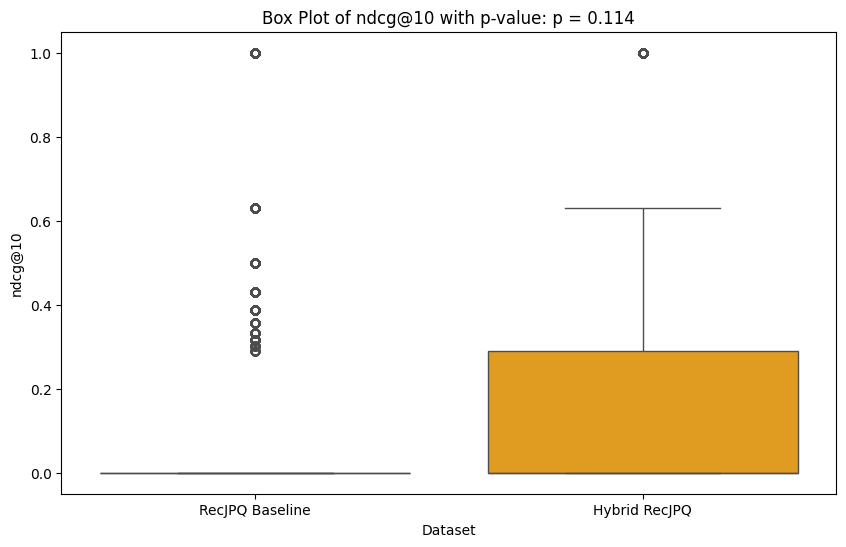

In [5]:
def plot_box_with_significance(df1, df2, column_name, alpha=0.05):
    plt.figure(figsize=(10, 6))
    data = pd.DataFrame({
        'Value': pd.concat([df1[column_name], df2[column_name]], axis=0),
        'Dataset': ['RecJPQ Baseline'] * len(df1[column_name]) + ['Hybrid RecJPQ'] * len(df2[column_name])
    })
    
    sns.boxplot(x='Dataset', y='Value', data=data, palette={'RecJPQ Baseline': 'blue', 'Hybrid RecJPQ': 'orange'})
    
    # Perform t-test
    t_stat, p_val = ttest_ind(df1[column_name], df2[column_name])
    
    # Annotate p-value
    significance = ""
    if p_val < alpha:
        significance = f"p < {alpha}"
    else:
        significance = f"p = {p_val:.3f}"
    
    plt.title(f'Box Plot of {column_name} with p-value: {significance}')
    plt.xlabel('Dataset')
    plt.ylabel(column_name)
    plt.show()


plot_box_with_significance(df1, df2, 'ndcg@10')

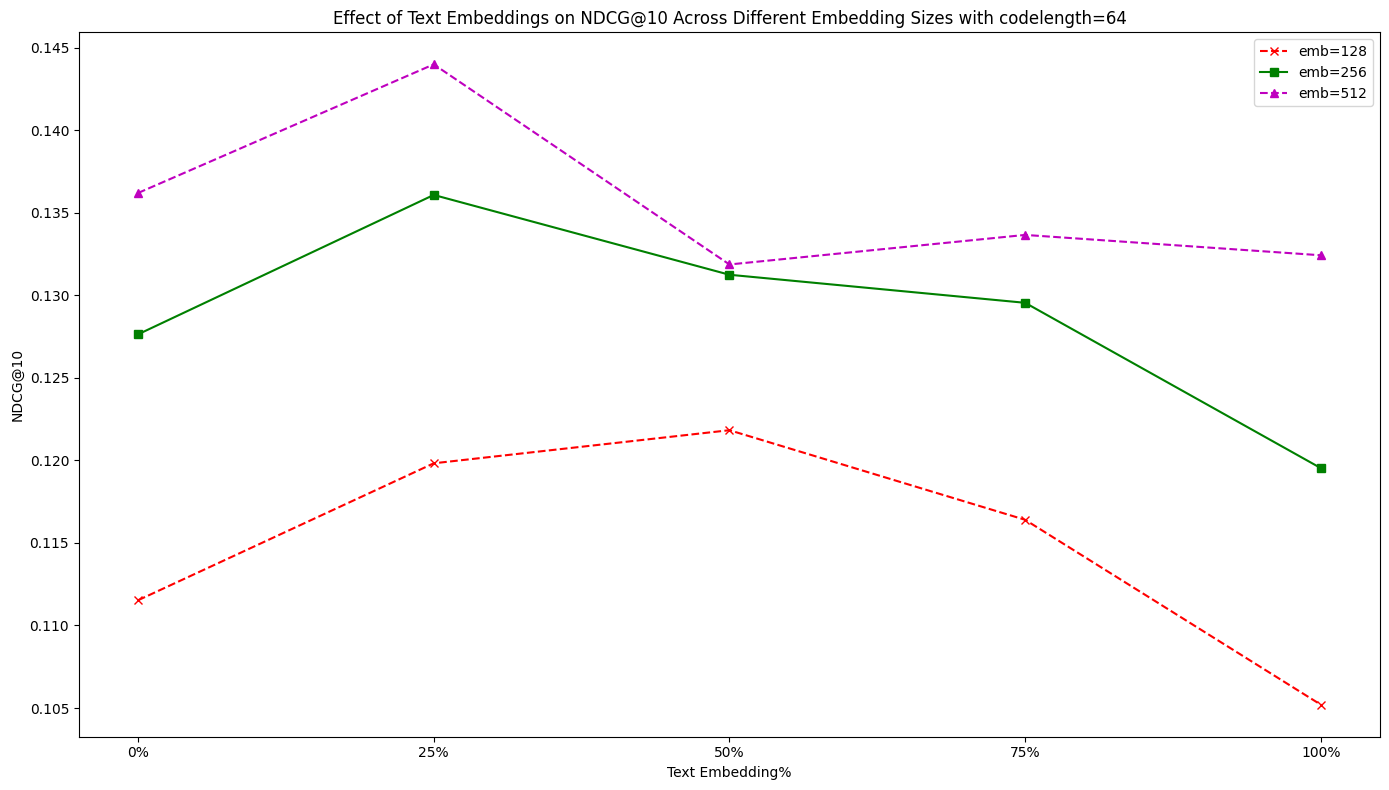

In [10]:
import matplotlib.pyplot as plt

#For both Title and Genre

# Data for the models
model_names = ["0%", "25%", "50%", "75%", "100%"]

#128 and 256 75% text values pending
emb_128 = [0.11153, 0.11983, 0.121835, 0.116405, 0.1052]
emb_256 = [0.127645, 0.136093, 0.131256, 0.134704, 0.119536]
emb_512 = [0.136211, 0.144007, 0.131879, 0.13367, 0.132437]

# Plotting the graph
plt.figure(figsize=(14, 8))

# Plot each model's NDCG@10 data
#plt.plot(model_names, emb_64, marker='o', linestyle='-', color='b', label='emb=64')
plt.plot(model_names, emb_128, marker='x', linestyle='--', color='r', label='emb=128')
plt.plot(model_names, emb_256, marker='s', linestyle='-', color='g', label='emb=256')
plt.plot(model_names, emb_512, marker='^', linestyle='--', color='m', label='emb=512')


# Adding labels and title
plt.xticks(rotation=0)
plt.xlabel('Text Embedding%')
plt.ylabel('NDCG@10')
plt.title('Effect of Text Embeddings on NDCG@10 Across Different Embedding Sizes with codelength=64')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


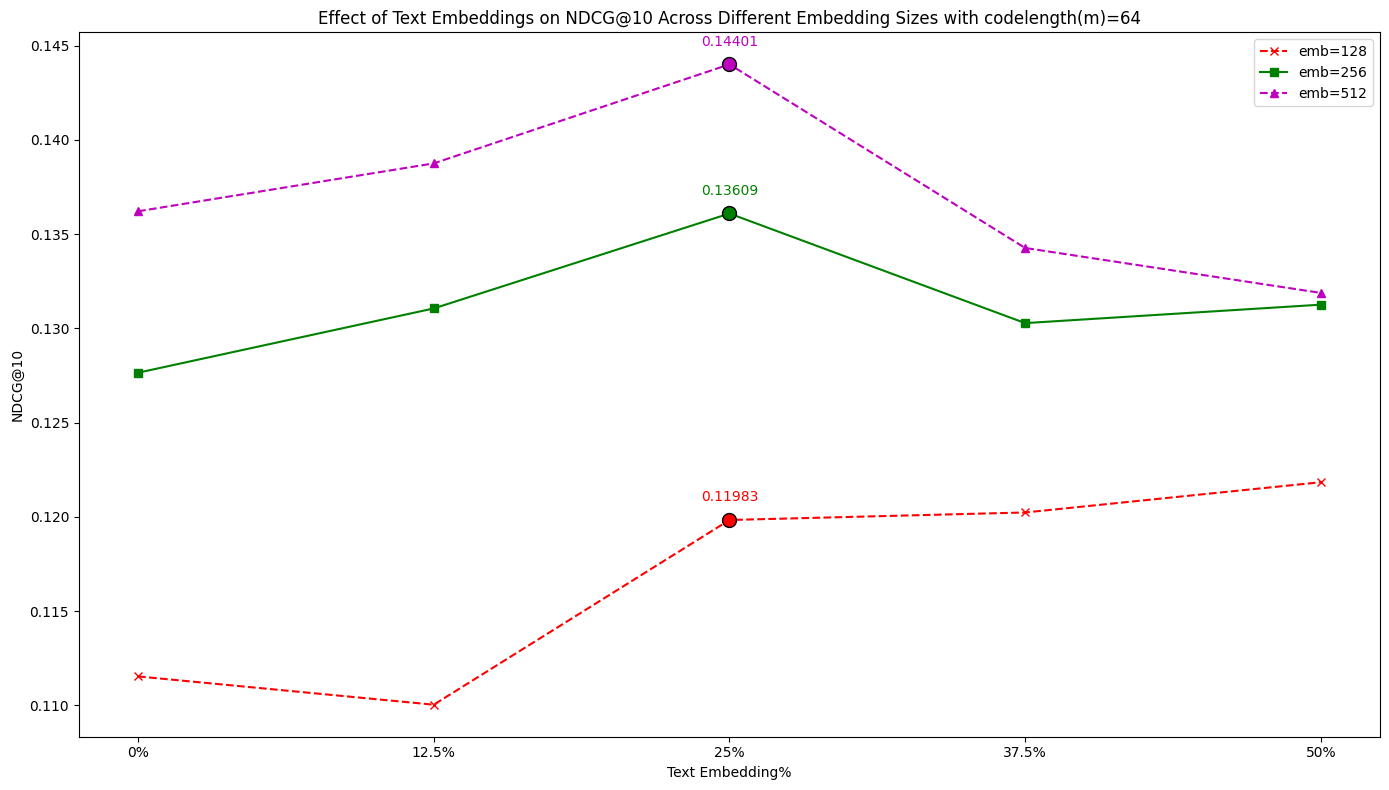

In [12]:
import matplotlib.pyplot as plt

# For Only Genre

# Data for the models
model_names = ["0%", "12.5%", "25%", "37.5%", "50%"]

# 128 75% text value pending
emb_128 = [0.11153, 0.110029, 0.11983, 0.120229, 0.121835]
emb_256 = [0.127645, 0.131056, 0.136093, 0.130277, 0.131256]
emb_512 = [0.136211, 0.138753, 0.144007, 0.134264, 0.131879]

# Index of the 25% value
highlight_index = model_names.index("25%")

# Plotting the graph
plt.figure(figsize=(14, 8))

# Plot each model's NDCG@10 data
plt.plot(model_names, emb_128, marker='x', linestyle='--', color='r', label='emb=128')
plt.plot(model_names, emb_256, marker='s', linestyle='-', color='g', label='emb=256')
plt.plot(model_names, emb_512, marker='^', linestyle='--', color='m', label='emb=512')

# Highlight the 25% values
plt.scatter(["25%"], [emb_128[highlight_index]], color='r', s=100, edgecolors='black', zorder=5)
plt.scatter(["25%"], [emb_256[highlight_index]], color='g', s=100, edgecolors='black', zorder=5)
plt.scatter(["25%"], [emb_512[highlight_index]], color='m', s=100, edgecolors='black', zorder=5)

# Annotate the highlighted points with their values
plt.text("25%", emb_128[highlight_index] + 0.001, f"{emb_128[highlight_index]:.5f}", color='r', ha='center')
plt.text("25%", emb_256[highlight_index] + 0.001, f"{emb_256[highlight_index]:.5f}", color='g', ha='center')
plt.text("25%", emb_512[highlight_index] + 0.001, f"{emb_512[highlight_index]:.5f}", color='m', ha='center')

# Adding labels and title
plt.xticks(rotation=0)
plt.xlabel('Text Embedding%')
plt.ylabel('NDCG@10')
plt.title('Effect of Text Embeddings on NDCG@10 Across Different Embedding Sizes with codelength(m)=64')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


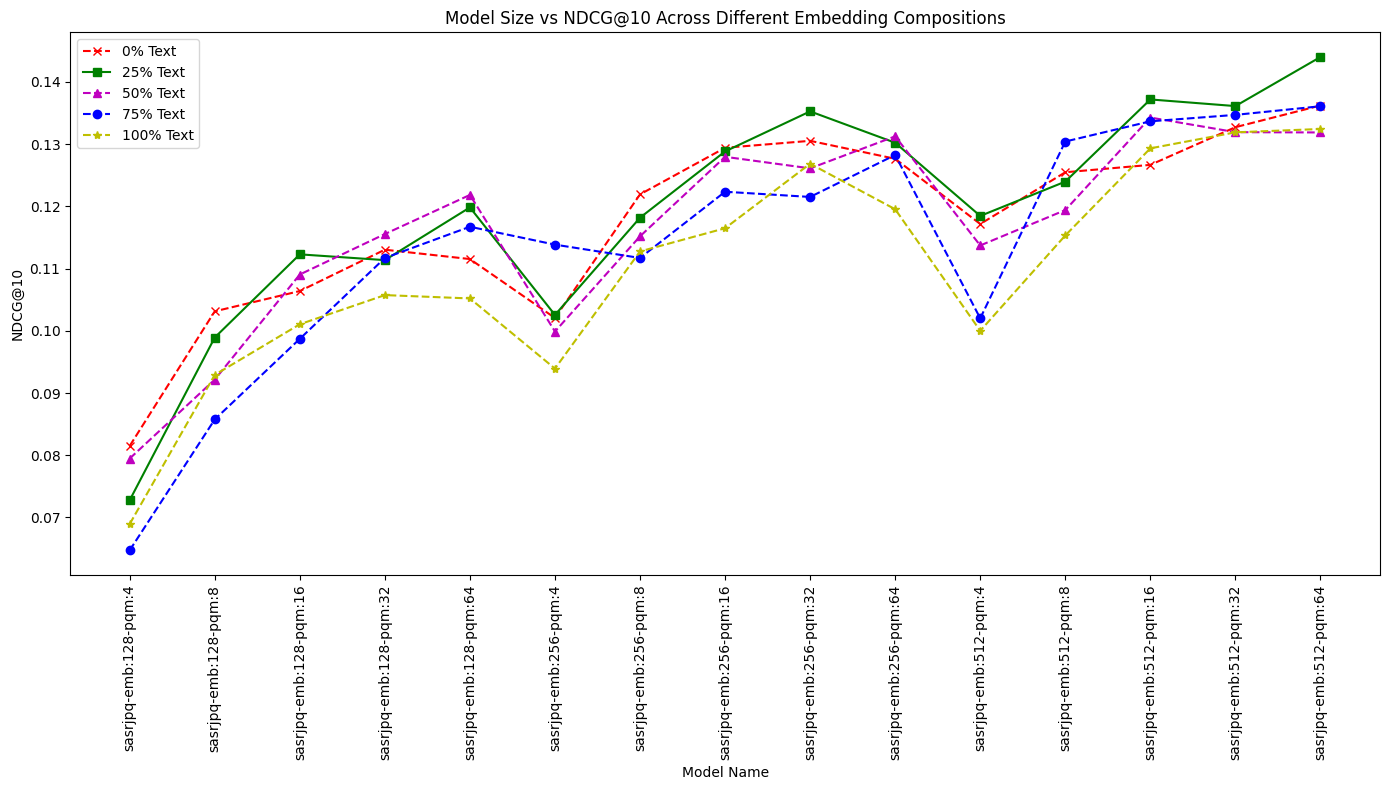

In [18]:
model_names = [
    "sasrjpq-emb:128-pqm:4",
    "sasrjpq-emb:128-pqm:8",
    "sasrjpq-emb:128-pqm:16",
    "sasrjpq-emb:128-pqm:32",
    "sasrjpq-emb:128-pqm:64",
    "sasrjpq-emb:256-pqm:4",
    "sasrjpq-emb:256-pqm:8",
    "sasrjpq-emb:256-pqm:16",
    "sasrjpq-emb:256-pqm:32",
    "sasrjpq-emb:256-pqm:64",
    "sasrjpq-emb:512-pqm:4",
    "sasrjpq-emb:512-pqm:8",
    "sasrjpq-emb:512-pqm:16",
    "sasrjpq-emb:512-pqm:32",
    "sasrjpq-emb:512-pqm:64"
]

model1_ndcg_10 = [0.0814919,0.103127,0.106387,0.113034,0.11153,0.102059,0.121929,0.129416,0.130532,0.127645,0.117164,0.12548,0.126668,0.132725,0.136211]

model2_ndcg_10 = [0.0727685, 0.0989193, 0.112285, 0.111358, 0.11983, 0.102548, 0.118177, 0.128829, 0.135266, 0.130223, 0.11846, 0.123976, 0.137184, 0.136118, 0.144007]

model3_ndcg_10 = [0.0794656, 0.0921554, 0.109047, 0.115548, 0.121835, 0.0998843, 0.115186, 0.127964, 0.126108, 0.131256, 0.113716, 0.119402, 0.134274, 0.131924, 0.131879]

model4_ndcg_10 = [0.0647159,0.0857484,0.0987056,0.1117,0.116724,0.113847,0.111706,0.122349,0.121514,0.128259,0.102,0.130421,0.13367,0.134704,0.136091]

model5_ndcg_10 = [0.0689368, 0.0929144, 0.10105, 0.105736, 0.1052, 0.0939234, 0.112755, 0.116483, 0.126847, 0.119536,0.1, 0.115324, 0.129326, 0.131897, 0.132437]



# Plotting the graph
plt.figure(figsize=(14, 8))

plt.plot(model_names, model1_ndcg_10, marker='x', linestyle='--', color='r', label='0% Text')
plt.plot(model_names, model2_ndcg_10, marker='s', linestyle='-', color='g', label='25% Text')
plt.plot(model_names, model3_ndcg_10, marker='^', linestyle='--', color='m', label='50% Text')
plt.plot(model_names, model4_ndcg_10, marker='o', linestyle='--', color='b', label='75% Text')
plt.plot(model_names, model5_ndcg_10, marker='*', linestyle='--', color='y', label='100% Text')

# Adding labels and title
plt.xticks(rotation=90)
plt.xlabel('Model Name')
plt.ylabel('NDCG@10')
plt.title('Model Size vs NDCG@10 Across Different Embedding Compositions')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()



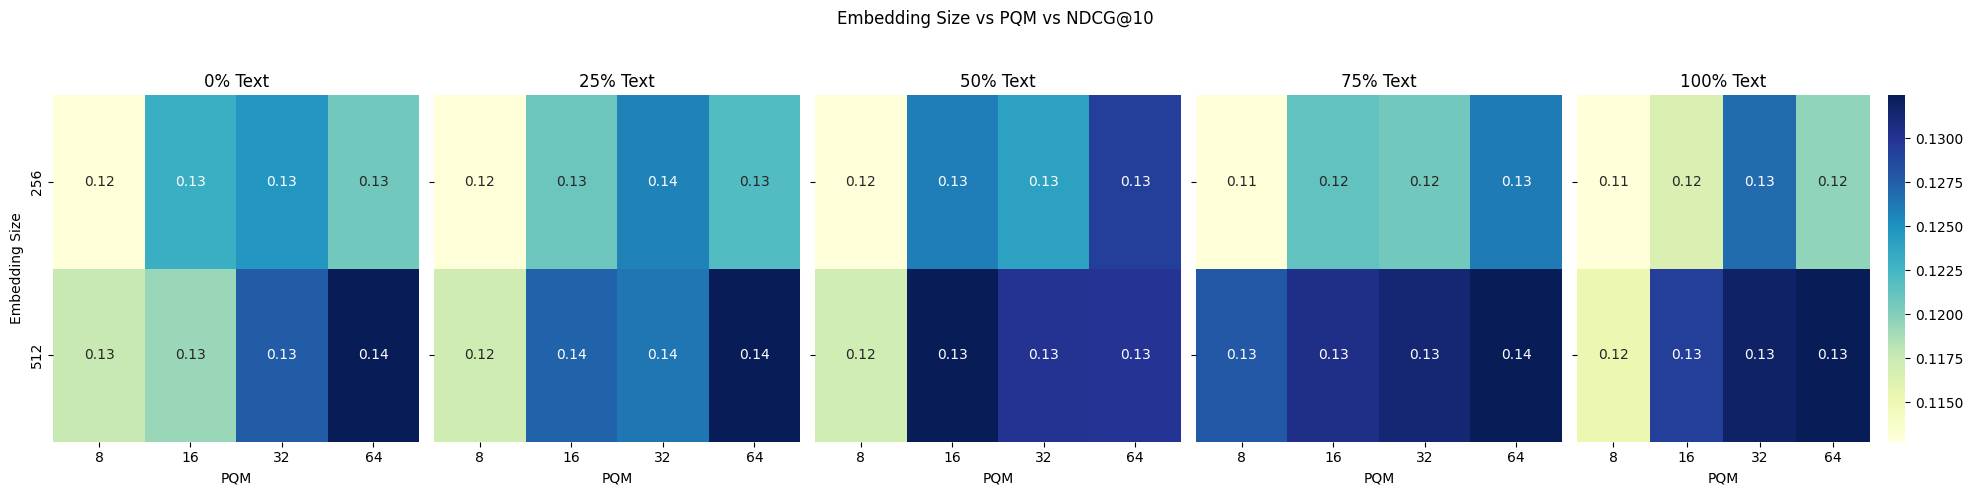

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the embedding sizes and pqm values
# embedding_sizes = [128, 256, 512]
# pqms = [4, 8, 16, 32, 64]

embedding_sizes = [256, 512]
pqms = [8, 16, 32, 64]

model1_ndcg_10 = [0.121929,0.129416,0.130532,0.127645,0.12548,0.126668,0.132725,0.136211]

model2_ndcg_10 = [ 0.118177, 0.128829, 0.135266, 0.130223, 0.123976, 0.137184, 0.136118, 0.144007]

model3_ndcg_10 = [0.115186, 0.127964, 0.126108, 0.131256, 0.119402, 0.134274, 0.131924, 0.131879]

model4_ndcg_10 = [0.111706,0.122349,0.121514,0.128259,0.130421,0.13367,0.134704,0.136091]

model5_ndcg_10 = [0.112755, 0.116483, 0.126847, 0.119536, 0.115324, 0.129326, 0.131897, 0.132437]


# Organize the NDCG@10 scores into a matrix for each model
model1_matrix = np.array(model1_ndcg_10).reshape((len(embedding_sizes), len(pqms)))
model2_matrix = np.array(model2_ndcg_10).reshape((len(embedding_sizes), len(pqms)))
model3_matrix = np.array(model3_ndcg_10).reshape((len(embedding_sizes), len(pqms)))
model4_matrix = np.array(model4_ndcg_10).reshape((len(embedding_sizes), len(pqms)))
model5_matrix = np.array(model5_ndcg_10).reshape((len(embedding_sizes), len(pqms)))

# Convert to DataFrame for easier plotting
model1_df = pd.DataFrame(model1_matrix, index=embedding_sizes, columns=pqms)
model2_df = pd.DataFrame(model2_matrix, index=embedding_sizes, columns=pqms)
model3_df = pd.DataFrame(model3_matrix, index=embedding_sizes, columns=pqms)
model4_df = pd.DataFrame(model4_matrix, index=embedding_sizes, columns=pqms)
model5_df = pd.DataFrame(model5_matrix, index=embedding_sizes, columns=pqms)

# Plot heatmaps for each model
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

sns.heatmap(model1_df, ax=axes[0], cmap="YlGnBu", annot=True, cbar=False)
axes[0].set_title('0% Text')
axes[0].set_xlabel('PQM')
axes[0].set_ylabel('Embedding Size')

sns.heatmap(model2_df, ax=axes[1], cmap="YlGnBu", annot=True, cbar=False)
axes[1].set_title('25% Text')
axes[1].set_xlabel('PQM')

sns.heatmap(model3_df, ax=axes[2], cmap="YlGnBu", annot=True, cbar=False)
axes[2].set_title('50% Text')
axes[2].set_xlabel('PQM')

sns.heatmap(model4_df, ax=axes[3], cmap="YlGnBu", annot=True, cbar=False)
axes[3].set_title('75% Text')
axes[3].set_xlabel('PQM')

sns.heatmap(model5_df, ax=axes[4], cmap="YlGnBu", annot=True, cbar=True)
axes[4].set_title('100% Text')
axes[4].set_xlabel('PQM')

plt.suptitle('Embedding Size vs PQM vs NDCG@10')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [6]:
import os
import sys
import gzip
import json
import pandas as pd
from scipy.stats import ttest_ind, ttest_rel
from argparse import ArgumentParser

'''Significance test for collaborative vs content embedding performance'''

predictions_file_1 = 'results/BERT4rec.ml-1m/ml1m_jpq_2024_08_19T18_42_55/predictions/sasrjpq-emb:512-pqm:64.json.gz' 
predictions_file_2 = 'results/BERT4rec.ml-1m/ml1m_jpq_2024_08_12T12_24_28/predictions/sasrjpq-emb:512-pqm:64.json.gz'
first_name = os.path.basename(predictions_file_1).rstrip(".json.gz")
second_name = os.path.basename(predictions_file_2).rstrip(".json.gz")

def get_metrics(doc):
    result = doc['metrics']
    if 'sampled_metrics' in doc:
        for key in doc['sampled_metrics']:
            result[f"sampled_{key}"] = doc['sampled_metrics'][key]
    return result

def read_data(filename):
    result = []
    data = json.load(gzip.open(filename))
    for doc in data:
        metrics = get_metrics(doc)
        result.append(metrics)
    return pd.DataFrame(result)

df1 = read_data(predictions_file_1)
df2 = read_data(predictions_file_2)
# print(df1.head())
# print(df2.head())

overlap_columns = set(df1.columns).intersection(set(df2.columns))
print(overlap_columns)

# Add metrics to be compared here
overlap_columns = ['ndcg@10']


docs = []

for column_name in overlap_columns:
    df1_series = df1[column_name]
    df2_series = df2[column_name]

    mean1 = df1_series.mean()
    mean2 = df2_series.mean()
    doc = {}
    doc["metric_name"] = column_name
    doc[first_name] = mean1
    doc[second_name] = mean2
    doc["difference"] = mean2 - mean1
    doc["difference_pct"] = (mean2 - mean1) * 100 / mean1
    t, pval = ttest_rel(df1_series, df2_series) 
    doc["p_value"] = pval 
    doc["p_value_bonferoni"] = pval * len(overlap_columns)
    docs.append(doc)

result = pd.DataFrame(docs)
result['significant_0.05'] = result["p_value"] < 0.05
result['significant_0.01'] = result["p_value"] < 0.01
result['significant_0.001'] = result["p_value"] < 0.001
result['significant_0.0001'] = result["p_value"] < 0.0001

with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.expand_frame_repr', False):  # more options can be specified also
    print(result)



{'HIT@10', 'ndcg@10', 'ndcg@5', 'ndcg@40', 'MAP@10', 'HIT@1', 'HIT@5', 'HIT@4', 'MRR'}
  metric_name  sasrjpq-emb:512-pqm:64  difference  difference_pct   p_value  p_value_bonferoni  significant_0.05  significant_0.01  significant_0.001  significant_0.0001
0     ndcg@10                0.136211    0.010389        8.256799  0.000327           0.000327              True              True               True               False


In [5]:
result

,metric_name,sasrjpq-emb:512-pqm:64,difference,difference_pct,p_value,p_value_bonferoni,significant_0.05,significant_0.01,significant_0.001,significant_0.0001
0,ndcg@10,0.136211,0.003774,2.849368,0.169021,0.169021,False,False,False,False


In [7]:
result

,metric_name,sasrjpq-emb:512-pqm:64,difference,difference_pct,p_value,p_value_bonferoni,significant_0.05,significant_0.01,significant_0.001,significant_0.0001
0,ndcg@10,0.136211,0.010389,8.256799,0.000327,0.000327,True,True,True,False
